In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for Precision WorkStation


In [2]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

xgboost is not loaded.

In [3]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [200]:
classes = ['pos', 'surPos', 'surNoclass']
num_samples_per_label = 1000
stacks = ['MD661']
win_id = 5

#############################################

structures_to_sample = ['SNR']

negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

margins_to_sample = [500]
surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                             for m in margins_to_sample
                             for s in structures_to_sample 
                             for surr_l in all_known_structures
                             if surr_l != s]
surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                             for m in margins_to_sample
                             for s in structures_to_sample]

labels_to_sample = []
if 'pos' in classes:
    labels_to_sample += structures_to_sample
if 'neg' in classes:
    labels_to_sample += negative_labels_to_sample
if 'surPos' in classes:
    labels_to_sample += surround_positive_labels_to_sample
if 'surNoclass' in classes:
    labels_to_sample += surround_noclass_labels_to_sample

###################################################

grid_indices_lookup_fps = {stack: DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, 
                                                                                             win_id=win_id,
                                                                         by_human=True, timestamp='latest')
                          for stack in stacks}    
addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
                                     stacks=stacks,
                                     labels_to_sample=labels_to_sample,
                                      grid_indices_lookup_fps=grid_indices_lookup_fps)

patches_gray = apply_function_to_dict(lambda addrs: \
                                 extract_patches_given_locations_multiple_sections(addrs, location_or_grid_index='grid_index', 
                                                                                   version='gray',
                                                                                  win_id=win_id), 
               addresses)

patches = apply_function_to_dict(lambda addrs: \
                                 extract_patches_given_locations_multiple_sections(addrs, location_or_grid_index='grid_index', 
                                                                                  win_id=win_id), 
               addresses)

#     variants = [0] # No rotation augmentation

#     addresses_vars = {}
#     for s, ps in patches.iteritems():
#         ps_vars = []
#         addrs_vars = []
#         for v in variants:
#             ps_var = rotate_all_patches_variant(ps, variant=v)
#             ps_vars.append(ps_var)
#             addrs_vars += addresses[s]
#         ps_vars = np.concatenate(ps_vars)

#         patch_images_fp = DataManager.get_dataset_patches_filepath(dataset_id=dataset_id, structure=s)      
# #         os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
#         create_parent_dir_if_not_exists(patch_images_fp)
#         bp.pack_ndarray_file(ps_vars, patch_images_fp)
#         upload_to_s3(patch_images_fp, local_root=DATA_ROOTDIR)

#         # Save training addresses
#         addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id, structure=s)
#         save_pickle(addrs_vars, addresses_fp)
#         upload_to_s3(addresses_fp, DATA_ROOTDIR)

#     del ps_vars, addrs_vars, patches, addresses

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*contours*"
latest timestamp:  08022017175151


Read: 0.69 seconds
Sample addresses (stack MD661): 0. seconds.
Sample addresses: 0.71 seconds
Load image: 3.28 seconds.
Load image: 3.40 seconds.
Load image: 3.46 seconds.
Load image: 3.29 seconds.
Load image: 3.37 seconds.
Load image: 3.42 seconds.
Load image: 3.40 seconds.
Load image: 3.41 seconds.
Load image: 3.35 seconds.
Load image: 3.37 seconds.
Load image: 3.39 seconds.
Load image: 3.48 seconds.
Load image: 3.34 seconds.
Load image: 3.38 seconds.
Load image: 3.37 seconds.
Load image: 3.24 seconds.
Load image: 108.85 seconds.
Load image: 105.38 seconds.
Load image: 91.57 seconds.
Load image: 102.72 seconds.
Load image: 95.56 seconds.
Load image: 87.79 seconds.
Load image: 87.73 seconds.
Load image: 106.76 seconds.
Load image: 94.59 seconds.
Load image: 100.56 seconds.
Load image: 111.56 seconds.
Load image: 100.66 seconds.
Load image: 92.63 seconds.
Load image: 111.49 seconds.
Load image: 96.46 seconds.
Load image: 107.75 seconds.


In [172]:
sigma = np.std(np.array(patches['SNR'])[...,2])

# patches_normalized = defaultdict(list)
patches_normalized_uint8 = defaultdict(list)

for label, ptcs in patches.iteritems():
    for p in ptcs:
        mu = p[..., 2].mean()
#         sigma = p[..., 2].std()
        p_normalized = (p[..., 2] - mu) / sigma
#         patches_normalized[label].append(p_normalized)
        
        p_normalized_uint8 = rescale_intensity_v2(p_normalized, -1, 9)
        patches_normalized_uint8[label].append(p_normalized_uint8)
        
# patches_normalized.default_factory = None
patches_normalized_uint8.default_factory = None

In [ ]:
windowing_properties = windowing_settings[win_id]
patch_size = windowing_properties['patch_size']
half_size = patch_size/2
spacing = windowing_properties['spacing']

sample_locations_allStacks = {}
for stack in stacks:
    w, h = metadata_cache['image_shape'][stack]
    sample_locations_allStacks[stack] = grid_parameters_to_sample_locations(grid_spec=(patch_size, spacing, w, h))

In [179]:
patch_locations = {label: [(st, sec, sample_locations_allStacks[st][grid_idx]) for st, sec, grid_idx in addrs] 
 for label, addrs in addresses.iteritems()}

In [232]:
# training_patches = patches
training_patches = patches_normalized_uint8
# training_patches = patches_gray

In [233]:
features_allLabels = {}

for label in patches.iterkeys():

    print label, len(training_patches[label])

    # If using patch size different from 224x224, resize the patches before feeding to CNN.
    if windowing_settings[win_id]['patch_size'] == 448:
        training_patches[label] = [p[::2, ::2] for p in training_patches[label]]

    features = convert_image_patches_to_features(patches=training_patches[label], model=model, mean_img=mean_img, batch_size=batch_size)
    features_allLabels[label] = features
    
    ##################################################

#     # Save training features
#     features_fp = DataManager.get_dataset_features_filepath(dataset_id=feature_dataset_id, structure=label, ext='bp')
#     create_parent_dir_if_not_exists(features_fp)
#     bp.pack_ndarray_file(features, features_fp)
#     upload_to_s3(features_fp, local_root=DATA_ROOTDIR)

#     # Save training addresses
#     addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=feature_dataset_id, structure=label)
#     save_pickle(training_addresses, addresses_fp)
#     upload_to_s3(addresses_fp, local_root=DATA_ROOTDIR)

SNR_surround_500_SNC 411
(411, 1, 224, 224)
SNR_surround_500_PBG 257
(257, 1, 224, 224)
SNR_surround_500_VLL 732
(732, 1, 224, 224)
SNR 1000
(1000, 1, 224, 224)
SNR_surround_500_noclass 1000
(1000, 1, 224, 224)
SNR_surround_500_Pn 6
(256, 1, 224, 224)


In [234]:
training_accuracies = {}

In [235]:
trained_classifiers = {}

In [236]:
margin_um = 500
feature_classifier_model = 'lr'
sample_weighting = None
neg_composition = 'neg_has_all_surround'
svm_id = None
num_samples_per_class = 500

for structure in ['SNR']:
#     for structure in all_known_structures:

    # Determine which labels to load.

    structures_to_sample = [structure]
    # structures_to_sample = all_known_structures
    # structures_to_sample = ['Pn']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = [margin_um]
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    if neg_composition == 'neg_has_everything_else':
        labels_to_sample = structures_to_sample + negative_labels_to_sample
    elif neg_composition == 'neg_has_only_surround_noclass':
        labels_to_sample = structures_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_all_surround':
        labels_to_sample = structures_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_surround_and_negative':
        labels_to_sample = structures_to_sample + negative_labels_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample
    else:
        raise Exception("neg_composition %s not recognized" % neg_composition)

    ######################

#     training_set_ids = map(int, str(classifier_properties['train_set_id']).split('/'))
#     training_features, training_addresses = DataManager.load_datasets_bp(training_set_ids, 
#                                                                          labels_to_sample=labels_to_sample)
    training_features = {}
    for l in labels_to_sample:
        if l in features_allLabels:
            training_features[l] = features_allLabels[l]

    ########################

    labels_found = training_features.keys()
    structures_found = set([convert_to_original_name(l) for l in labels_found 
                        if convert_to_original_name(l) in labels_found]) - {'noclass'}

    ######################

    print structure

    #############################
    ## Define Positive Samples ##
    #############################

    features_pos = training_features[structure]

    if num_samples_per_class is not None:
        
        features_pos_sample_indices = np.random.choice(range(len(features_pos)), 
                                                     replace=False, 
                                                     size=(min(num_samples_per_class, len(features_pos)),))
        features_pos_unused_indices = np.setdiff1d(range(len(features_pos)), features_pos_sample_indices)
        features_pos_unused = features_pos[features_pos_unused_indices]
        
        features_pos = features_pos[features_pos_sample_indices]

    n_pos = len(features_pos)
    print n_pos, 'positive examples'

    #############################
    ## Define Negative Samples ##
    #############################

    if neg_composition == 'neg_has_only_surround_noclass':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    elif neg_composition == 'neg_has_all_surround':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
    elif neg_composition == 'neg_has_everything_else':
        neg_classes = [structure + '_negative']
    elif neg_composition == 'neg_has_surround_and_negative':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
        neg_classes += [structure + '_negative']
    else:
        raise Exception('neg_composition %s is not recognized.' % neg_composition)

    features_neg = np.concatenate([training_features[neg_class] for neg_class in neg_classes])

    if num_samples_per_class is not None:
        features_neg_sample_indices = np.random.choice(range(len(features_neg)), 
                                                       replace=False,
                                                       size=(min(num_samples_per_class, len(features_neg)),))
        
        features_neg_unused_indices = np.setdiff1d(range(len(features_neg)), features_neg_sample_indices)
        features_neg_unused = features_neg[features_neg_unused_indices]
        
        features_neg = features_neg[features_neg_sample_indices]
        

    n_neg = len(features_neg)
    print n_neg, 'negative examples'

    ###########################
    ## Define Sample Weights ##
    ###########################

    if sample_weighting == 'weighted':
        neg_distances = np.concatenate([distances_to_structures[neg_class][structure] for neg_class in neg_classes])

        sample_weights_neg = np.ones((n_neg,))
        sample_weights_neg[neg_distances > thresh] = diminishing(neg_distances[neg_distances > thresh])
        sample_weights = np.r_[np.ones((n_pos,)), sample_weights_neg]
    else:
        sample_weights = None

    ###########################################################################################

    train_data = np.r_[features_pos, features_neg]
    train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]

    #     n_train = len(train_labels0)
    #     ri = np.random.choice(range(n_train), size=100, replace=False)
    #     train_data = train_data0[ri]
    #     train_labels = train_labels0[ri]

    #####################################
    ## Define feature_classifier_model ##
    #####################################

    if feature_classifier_model == 'lr':
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)

    elif feature_classifier_model == 'lin_svc':
        clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=1000, max_iter=-1,
              decision_function_shape=None, random_state=None)


    elif feature_classifier_model == 'lin_svc_calib':

        sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                                C=1.0, multi_class='ovr', 
                                fit_intercept=True, intercept_scaling=1, max_iter=100)
        clf = CalibratedClassifierCV(sv_uncalibrated)


    elif feature_classifier_model == 'xgb1':
        clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                            silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                            min_child_weight=20, max_delta_step=0, subsample=.8, 
                            colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                            scale_pos_weight=1, base_score=0.5, seed=0, missing=None)

    elif feature_classifier_model == 'xgb2':
        clf = XGBClassifier(max_depth=5, learning_rate=0.2, n_estimators=100, 
                            silent=False, objective='binary:logistic')
        # 40s, 10,000 pos and 10,000 neg samples

    elif feature_classifier_model == 'gb1':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=3, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')

    elif feature_classifier_model == 'gb2':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=5, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')


    else:
        sys.stderr.write('Setting is not recognized.\n')

    t = time.time()    
    clf.fit(train_data, train_labels, sample_weight=sample_weights)
    sys.stderr.write('Fitting classifier: %.2f seconds\n' % (time.time() - t))

    trained_classifiers[structure] = clf
    
#         clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
#         create_parent_dir_if_not_exists(clf_fp)
#         joblib.dump(clf, clf_fp)
#         upload_to_s3(clf_fp)

    from sklearn.metrics import accuracy_score
    train_acc = accuracy_score(train_labels, clf.predict(train_data), normalize=True)
    print train_acc

    training_accuracies[structure] = train_acc

SNR
500 positive examples
500 negative examples
0.94


Fitting classifier: 0.21 seconds


In [204]:
contours_df = DataManager.load_annotation_v4(stack=stack, by_human=True, suffix='contours', timestamp='latest')
contours = contours_df[(contours_df['orientation'] == 'sagittal') & (contours_df['downsample'] == 1)]
# contours = contours.drop_duplicates(subset=['section', 'name', 'side', 'filename', 'downsample', 'creator'])
contours = contours.drop_duplicates(subset=['section', 'name', 'side', 'downsample', 'creator'])

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*contours*"
latest timestamp:  08022017175151


In [205]:
contours_df = convert_annotation_v3_original_to_aligned_cropped(contours, stack=stack, out_downsample=1)

download_from_s3(DataManager.get_thumbnail_mask_dir_v3(stack=stack, prep_id=2), is_dir=True)
contours_grouped = contours_df.groupby('section')

In [206]:
# Get bounding boxes for every structure on every section.

margin_um = 500

local_region_bboxes_allStructures_allSections = {structure: {} for structure in all_known_structures_sided}
for structure in all_known_structures_sided:
    name, side = parse_label(structure)[:2]
    if side is None:
        side = 'S'
    margin_pixel = margin_um / XY_PIXEL_DISTANCE_LOSSLESS
    q = contours_df[(contours_df['name'] == name) & (contours_df['side'] == side)]
    for cnt_id, cnt in q.iterrows():
        vs = cnt['vertices']
        xmin, ymin = vs.min(axis=0) 
        xmax, ymax = vs.max(axis=0)
        local_region_bboxes_allStructures_allSections[structure][cnt['section']] = (max(0, int(np.floor(xmin-margin_pixel))),
                                            min(w-1, int(np.ceil(xmax+margin_pixel))),
                                            max(0, int(np.floor(ymin-margin_pixel))),
                                            min(h-1, int(np.ceil(ymax+margin_pixel))))

In [85]:
local_region_bboxes_allStructures_allSections

NameError: name 'local_region_bboxes_allStructures_allSections' is not defined

In [208]:
structures = ['SNR']

In [210]:
sec = 146

roi_xmin, roi_xmax, roi_ymin, roi_ymax = local_region_bboxes_allStructures_allSections['SNR_L'][145]
roi_w = roi_xmax + 1 - roi_xmin
roi_h = roi_ymax + 1 - roi_ymin
filenames = [metadata_cache['sections_to_filenames'][stack][sec]]

In [320]:
normalization_schemes = [None, 'normalize_mu_patch_sigma_wholeImage_(-1,9)']
test_variants = [0]

In [321]:
sparse_grids_allSchemes_allFns_allStructs = {}
features_allSchemes_allFns_allVariants = defaultdict(lambda: defaultdict(dict))

locate patches: 0.03 seconds
5544 samples.
Extract patches: 0.15 seconds


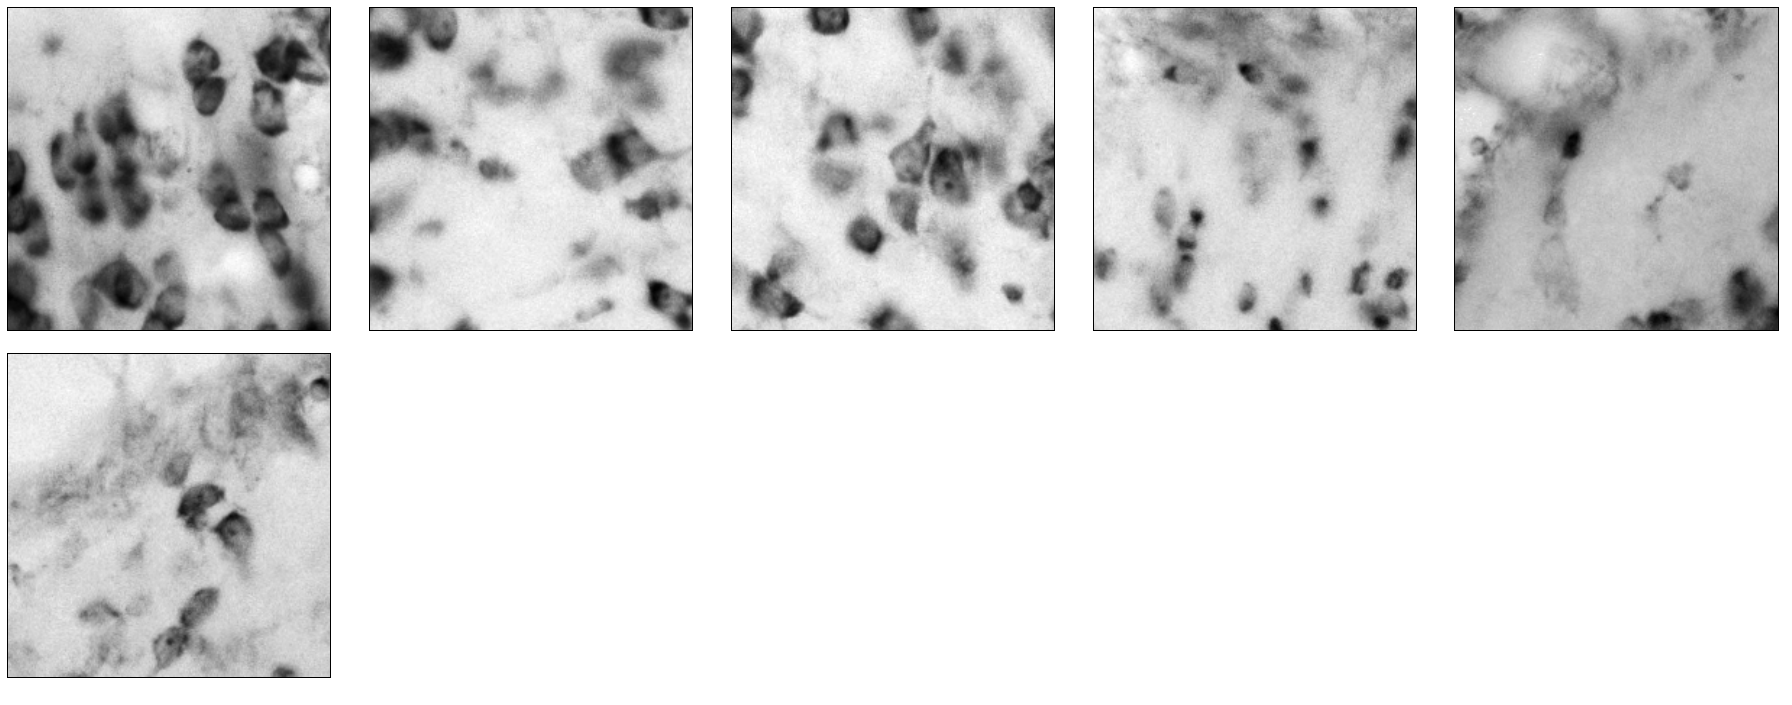

Variants: 0.00 seconds


(5544, 1, 224, 224)


Feature computation: 8.90 seconds
Extract patches: 5.16 seconds


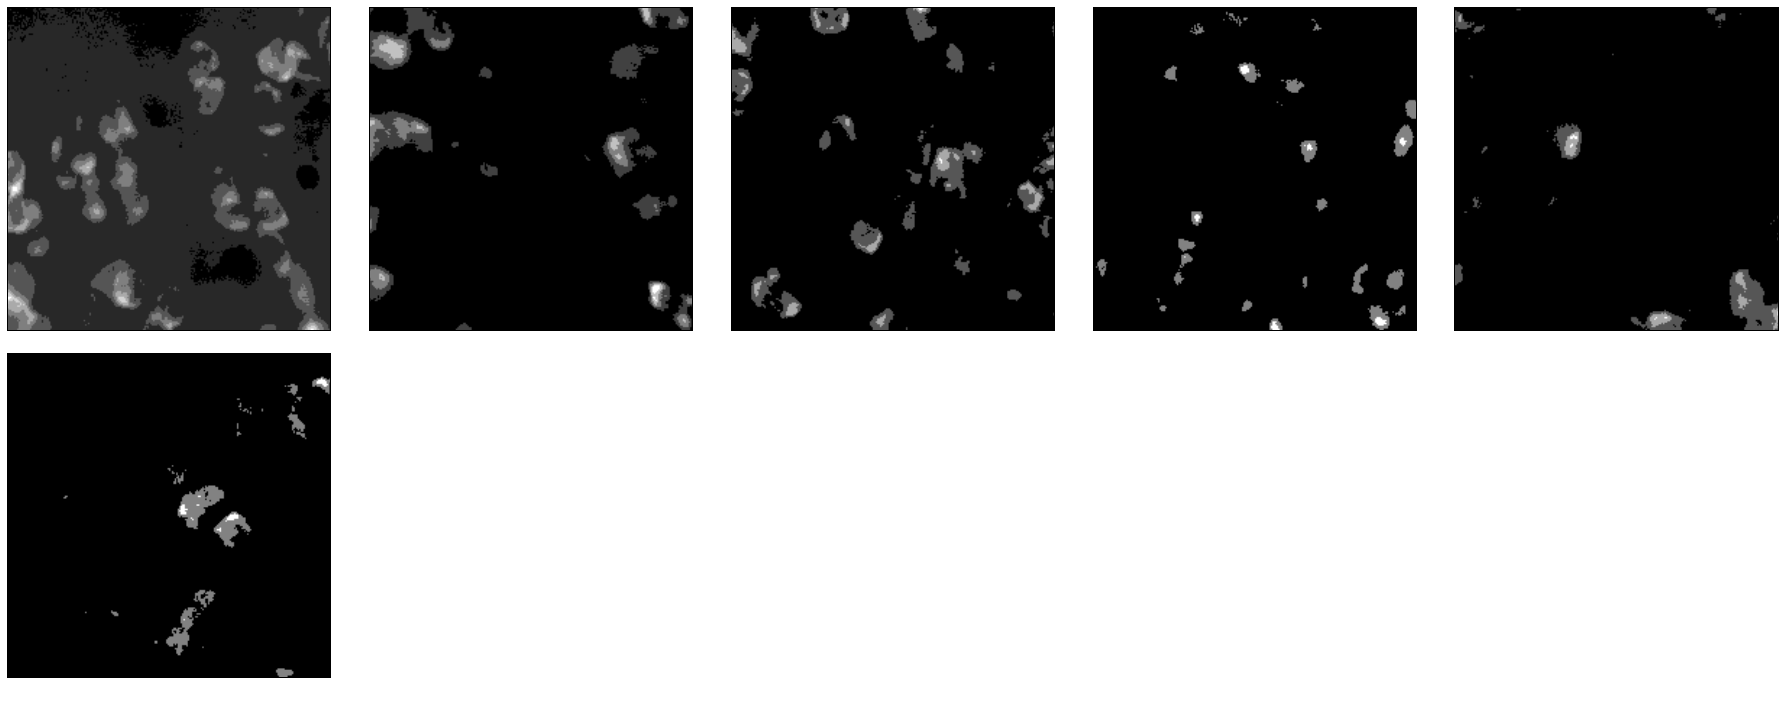

Variants: 0.00 seconds


(5544, 1, 224, 224)


Feature computation: 8.73 seconds


In [322]:
for fn in filenames:

    ####################

    t = time.time()
    mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=2, fn=fn)
    indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb, 
                                    bbox_lossless=(roi_xmin,roi_ymin,roi_w,roi_h))
    sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       

    sparse_grids_allSchemes_allFns_allStructs[fn] = indices_roi

    n = len(indices_roi)
    sys.stderr.write('%d samples.\n' % n)

    ############################

    sample_locations_roi = sample_locations_allStacks[stack][indices_roi]

    ###########################

    t = time.time()
    
    img_16bit = DataManager.load_image_v2(stack=stack, fn=fn, prep_id=2, resol='lossless')[..., 2] # 16bit
    img_gray_8bit = DataManager.load_image_v2(stack=stack, fn=fn, prep_id=2, resol='lossless', version='gray') # 8bit
    
    for scheme in normalization_schemes:
        if scheme in ['min', 'median', 'max', 'sec_spec_median']:
            pass
#             if scheme == 'min':
#                 mapping_fp = os.path.join(DATA_DIR, 'min_nissl_intensity_mapping.npy')
#             elif scheme == 'median':
#                 mapping_fp = os.path.join(DATA_DIR, 'median_nissl_intensity_mapping.npy')
#             elif scheme == 'max':
#                 mapping_fp = os.path.join(DATA_DIR, 'max_nissl_intensity_mapping.npy')
#             elif scheme == 'sec_spec_median':
#                 mapping_fp = DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath(stack=stack, ntb_fn=fn)                
#             download_from_s3(mapping_fp)
#             intensity_mapping_ntb_to_nissl = np.load(mapping_fp)
#             img_blue_intensity_normalized = intensity_mapping_ntb_to_nissl[img_blue_local_region.astype(np.int)].astype(np.uint8)                
        elif isinstance(scheme, tuple) and len(scheme) == 2:
            pass
#             low, high = scheme
#             img_blue_intensity_normalized = rescale_intensity_v2(img_blue_local_region, low, high)
        else:
            t = time.time()
            if scheme is None:
                base_img = img_gray_8bit
            elif scheme == 'normalize_mu_patch_sigma_wholeImage_(-1,9)':
                base_img = img_16bit
            else:
                raise "Which base image to use?"
                
            test_patches = extract_patches_given_locations(img=base_img, 
                                                           locs=sample_locations_roi - (roi_xmin-666, roi_ymin-666), 
                                                           patch_size=224, 
                                                           normalization_scheme=scheme)
        
        sys.stderr.write('Extract patches: %.2f seconds\n' % (time.time() - t))
        display_images_in_grids(test_patches[::1000], nc=5, cmap=plt.cm.gray)
            
        assert isinstance(test_patches[0], np.ndarray) and test_patches[0].dtype == np.uint8 and test_patches[0].flags.contiguous

        #############################################
        
#         extra_margin = 200
#         patches_enlarged = extract_patches_given_locations(img=img_blue_intensity_normalized, 
#                                                            locs=sample_locations_roi, 
#                                                            patch_size=224+2*extra_margin)            
        for variant in test_variants:

            t = time.time()
#             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
            patches_rotated = rotate_all_patches_variant(test_patches, variant=variant)
            sys.stderr.write('Variants: %.2f seconds\n' % (time.time() - t))

            #############################

            t1 = time.time()
            features = convert_image_patches_to_features(patches_rotated, model=model, 
                                                         mean_img=mean_img, 
                                                         batch_size=batch_size)

            features_allSchemes_allFns_allVariants[scheme][fn][variant] = features
            sys.stderr.write('Feature computation: %.2f seconds\n' % (time.time() - t1))

            #################################

features_allSchemes_allFns_allVariants.default_factory = None

In [312]:
conditions = [(0, 'test_no_rot')]
available_classifiers = {0: trained_classifiers}

In [313]:
sparse_scores_allSchemes_allFns_allStructs_allConditions = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for condition in conditions:
    
    if condition[1] == 'test_no_rot':
        test_variants = range(1)
    elif condition[1] == 'test_with_rot':
        test_variants = range(8)
    
    svm_id = condition[0]
        
    for fn in filenames:
        for scheme in normalization_schemes:
#         for low, high in [(-200,0)]:

            probs_allClasses_allVariations = []

            for variant in test_variants:
                
                def clf_predict(stack, fn):
                    clf_allClasses_ = available_classifiers[svm_id]
                    probs_allClasses = {}
                    for s in structures:
                        clf = clf_allClasses_[s]
                        features = features_allSchemes_allFns_allVariants[scheme][fn][variant]
                        probs = clf.predict_proba(features)[:, clf.classes_.tolist().index(1.)]
                        probs_allClasses[s] = probs
                    return probs_allClasses

#                 t = time.time()
                probs_allClasses = clf_predict(stack=stack, fn=fn)
                probs_allClasses_allVariations.append(probs_allClasses)

                #         probs_allFns_allClasses[fn] = clf_predict(stack=stack, fn=fn)

                #         pool = Pool(NUM_CORES/2)
                #         probs_allFns_allClasses = dict(zip(filenames, pool.map(lambda fn: clf_predict(stack=stack, fn=fn), filenames)))
                #         pool.close()
                #         pool.join()
#                 sys.stderr.write('Classifier predict: %.2f s\n' % (time.time()-t))

            for s in structures:
                pvs = [probs_allClasses_allVariations[v][s] for v in test_variants]
                sparse_scores_allSchemes_allFns_allStructs_allConditions[scheme][fn][s][condition] = np.max(pvs, axis=0)    

sparse_scores_allSchemes_allFns_allStructs_allConditions.default_factory = None

In [314]:
scoremap_viz_allSchemes_allFns_allStructs_allConditions = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

In [317]:
downscale = 32
img_blue_intensity_normalized = {}

# img_blue_local_region = img_blue[roi_ymin:(roi_ymin+roi_h), roi_xmin:(roi_xmin+roi_w)]
# img_blue_local_region2 = crop_large_image(fp=img_blue_fp, bbox=(roi_xmin,roi_xmax,roi_ymin,roi_ymax))
img_blue_local_region2 = img_blue_local_region

for fn in filenames:
    
    for scheme in normalization_schemes:
        img_blue_intensity_normalized[scheme] = img_blue_local_region2
#         if scheme in ['min', 'median', 'max', 'sec_spec_median']:
#             pass
#             if scheme == 'min':
#                 mapping_fp = os.path.join(DATA_DIR, 'min_nissl_intensity_mapping.npy')
#             elif scheme == 'median':
#                 mapping_fp = os.path.join(DATA_DIR, 'median_nissl_intensity_mapping.npy')
#             elif scheme == 'max':
#                 mapping_fp = os.path.join(DATA_DIR, 'max_nissl_intensity_mapping.npy')
#             elif scheme == 'sec_spec_median':
#                 mapping_fp = DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath(stack=stack, ntb_fn=fn)                
#             download_from_s3(mapping_fp)
#             intensity_mapping_ntb_to_nissl = np.load(mapping_fp)
#             img_blue_intensity_normalized[scheme] = intensity_mapping_ntb_to_nissl[img_blue_local_region2.astype(np.int)].astype(np.uint8)            
#         elif scheme in ['none']:
#             img_blue_intensity_normalized[scheme] = img_blue_local_region2
#         else:
#             pass
#             low, high = scheme
#             img_blue_intensity_normalized[scheme] = rescale_intensity_v2(img_blue_local_region2, low, high)
            
    for structure in structures:
        for scheme in normalization_schemes:
            for cond in conditions:

                def resample_scoremap(fn, s):
                    """
                    Args:
                        s: structure
                        
                    Returns:
                        : scoremap (downscale=32)
                    """
                    
                    downscaled_grid_y = np.arange(0, h, downscale)
                    downscaled_grid_x = np.arange(0, w, downscale)
                    downscaled_ny = len(downscaled_grid_y)
                    downscaled_nx = len(downscaled_grid_x)

                    sparse_scores = sparse_scores_allSchemes_allFns_allStructs_allConditions[scheme][fn][s][cond] 

                    f_grid = np.zeros(((h-half_size)/spacing+1, (w-half_size)/spacing+1))
                    a = (sample_locations_roi - half_size)/spacing
                    f_grid[a[:,1], a[:,0]] = sparse_scores

                    yinterps = (downscaled_grid_y - half_size)/float(spacing)
                    xinterps = (downscaled_grid_x - half_size)/float(spacing)

                    points_y, points_x = np.broadcast_arrays(yinterps.reshape(-1,1), xinterps)
                    coord = np.c_[points_y.flat, points_x.flat]
                    f_interp = map_coordinates(f_grid, coord.T, order=1)
                    f_interp_2d = f_interp.reshape((downscaled_ny, downscaled_nx))
                    scoremap = f_interp_2d.astype(np.float16)
                        
                    return scoremap

#                 t = time.time()
                scoremap = resample_scoremap(fn, structure)
                #         pool = Pool(NUM_CORES/2)
                #         # pool = Pool(1)
                #         scoremaps_allFns_allClasses = dict(zip(filenames, pool.map(resample, filenames)))
                #         pool.close()
                #         pool.join()
#                 sys.stderr.write('Resample scoremap: %.2f seconds\n' % (time.time() - t)) 

                #########################
    
                def save_scoremap(structure):
                    scoremap_viz = scoremap_overlay_on(bg=img_blue_intensity_normalized[scheme], 
                                                       in_downscale=1, stack=stack, fn=fn, structure=structure,
                                                       scoremap=scoremap[(roi_ymin-666)/32:(roi_ymin+666+roi_h)/32,
                                                                           (roi_xmin-666)/32:(roi_xmin+666+roi_w)/32],
                                                      in_scoremap_downscale=32,
                                                      out_downscale=8, label_text=str(structure), 
                                                      cmap_name= 'jet')
                #         pool = Pool(NUM_CORES)
                #         structures = scoremaps_allClasses.keys()
                #         scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn] = dict(zip(structures, pool.map(save_scoremap, structures)))
                #         pool.close()
                #         pool.join()
                    return scoremap_viz

                for s in structures:
                    scoremap_viz_allSchemes_allFns_allStructs_allConditions[scheme][fn][s][cond] = save_scoremap(s)

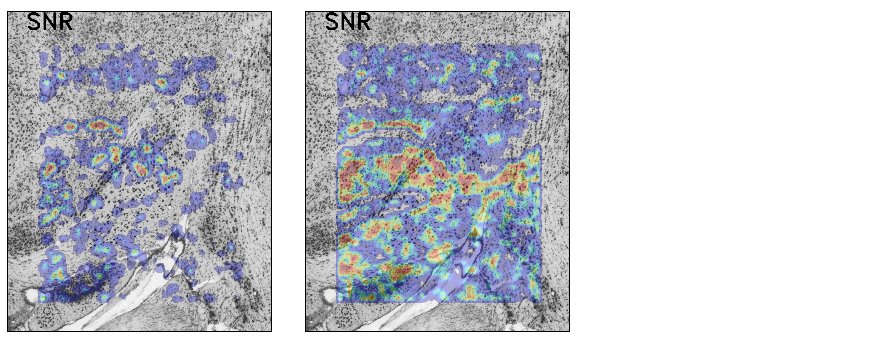

In [319]:
showing_test_condition = (0, 'test_no_rot')
showing_structure = structures[0]

title_viz_tuples = [("%s,%s" % (showing_structure, str(scheme)), vizs[showing_structure][showing_test_condition])
 for scheme, x in sorted(scoremap_viz_allSchemes_allFns_allStructs_allConditions.items())
 for fn, vizs in x.iteritems()]

titles, vizs = zip(*title_viz_tuples)

# display_images_in_grids(vizs=vizs, titles=titles, nc=3)
display_images_in_grids(vizs=vizs, nc=3)

In [4]:
win_id = 5

In [5]:
stacks = ['MD661', 'MD662']

In [6]:
windowing_properties = windowing_settings[win_id]
patch_size = windowing_properties['patch_size']
half_size = patch_size/2
spacing = windowing_properties['spacing']

sample_locations_allStacks = {}
for stack in stacks:
    w, h = metadata_cache['image_shape'][stack]
    sample_locations_allStacks[stack] = grid_parameters_to_sample_locations(grid_spec=(patch_size, spacing, w, h))

In [7]:
# addresses_df = DataFrame([(stack, sec, grid_idx) 
#            for stack in ['MD661', 'MD662'] 
#            for sec in np.arange(metadata_cache['section_limits'][stack][0], 
#                                 metadata_cache['section_limits'][stack][-1]+1)
#            for grid_idx in range(len(sample_locations_allStacks[stack]))], 
#           columns=['stack', 'section', 'grid_idx'])

In [8]:
# location_column = [sample_locations_allStacks[addr['stack']][addr['grid_idx']]
# for i, addr in addresses_df.iterrows()]

# addresses_df = addresses_df.assign(location=location_column)

In [7]:
grid_indices_lookup_allStacks = {}
for stack in stacks:
    try:
        grid_indices_lookup_allStacks[stack] = \
        DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
                                                           by_human=True, timestamp='latest')
    except:
        sys.stderr.write("Fail to load annotation grid lookup for %s.\n" % stack)

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*contours*"
latest timestamp:  08022017175151
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD662" "/home/yuncong/CSHL_labelings_v3/MD662" --exclude "*" --include "*contours*"


Fail to load annotation grid lookup for MD662.


In [8]:
all_labels = grid_indices_lookup_allStacks['MD661'].columns

In [9]:
address_multidx = pd.MultiIndex.from_tuples([(stack, sec, grid_idx) 
           for stack in ['MD661', 'MD662'] 
           for sec in np.arange(metadata_cache['section_limits'][stack][0], 
                                metadata_cache['section_limits'][stack][-1]+1)
           for grid_idx in range(len(sample_locations_allStacks[stack]))], 
          names=['stack', 'section', 'grid_idx'])

In [10]:
address_label_df_allStacks = DataFrame(columns=all_labels,
    index=address_multidx, data=False)

In [11]:
stack = 'MD661'

prep_id = 2

contours_df = DataManager.load_annotation_v4(stack=stack, by_human=True, suffix='contours', timestamp='latest')
contours = contours_df[(contours_df['orientation'] == 'sagittal') & (contours_df['downsample'] == 1)]
contours = contours.drop_duplicates(subset=['section', 'name', 'side', 'filename', 'downsample', 'creator'])

contours_df = convert_annotation_v3_original_to_aligned_cropped(contours, stack=stack)
download_from_s3(DataManager.get_thumbnail_mask_dir_v3(stack=stack, prep_id=prep_id), is_dir=True)

contours_grouped = contours_df.groupby('section')

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*contours*"
latest timestamp:  08022017175151


In [12]:
surround_margins = [200, 500]

In [ ]:
# # Different indexing method affects speed significantly.

# # Access a single element

# _ = address_label_df_allStacks['VCA'][(stack, sec, np.random.randint(0,1000,1)[0])]
# # The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
# # 10000 loops, best of 3: 37.3 µs per loop
# _ = address_label_df_allStacks.loc[(stack, sec, np.random.randint(0,1000,1)[0]), 'VCA']
# # 259 µs per loop
# address_label_df_allStacks.loc(axis=1)[(stack, sec, np.random.randint(0,1000,1)[0]), 'VCA']
# # 654 ms per loop

# # When access a list of elements, it is faster accessing them one by one.

# print address_label_df_allStacks.loc[(stack, sec, label_to_grid_indices_map['VCA'].tolist()), 'VCA']
# # 1 loop, best of 3: 17.5 s per loop

# for grid_idx in label_to_grid_indices_map['VCA']:
#     _ = address_label_df_allStacks.loc[(stack, sec, grid_idx), 'VCA']
# # 10 loops, best of 3: 48.8 ms per loop

In [13]:
for sec, cnt_group in contours_grouped:
    sys.stderr.write('Computing class label to grid indices lookup-table for section %d...\n' % sec)
    if is_invalid(sec=sec, stack=stack):
        continue
    polygons_this_sec = [(contour['name'], contour['vertices']) for contour_id, contour in cnt_group.iterrows()]
    mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, section=sec, prep_id=prep_id)

#     t = time.time()
    label_to_grid_indices_map = locate_patches_v2(grid_spec=win_id_to_gridspec(win_id=5, stack=stack), 
                                                  mask_tb=mask_tb, polygons=polygons_this_sec, \
                                                  surround_margins=surround_margins)
#     sys.stderr.write("Identify in-polygon grid indices: %.2f s\n" % (time.time()-t))
    
    for label, grid_indices in label_to_grid_indices_map.iteritems():
        if label == 'bg' or label == 'noclass' or 'negative' in label: # Ignore bg, noclass, x_negative
            continue
        sys.stderr.write("%s, sec %d: %d patches from label %s.\n" % (stack, sec, len(grid_indices), label))
#         t = time.time()
        for grid_idx in grid_indices:
            address_label_df_allStacks.loc[(stack, sec, grid_idx), label] = True
#         sys.stderr.write("%.2f s\n" % (time.time()-t))

Computing class label to grid indices lookup-table for section 90...
MD661, sec 90: 205 patches from label VCA.
MD661, sec 90: 179 patches from label VCA_surround_200_noclass.
MD661, sec 90: 585 patches from label VCA_surround_500_noclass.
Computing class label to grid indices lookup-table for section 91...
MD661, sec 91: 250 patches from label VCA.
MD661, sec 91: 458 patches from label VCA_surround_200_noclass.
MD661, sec 91: 1305 patches from label VCA_surround_500_noclass.
Computing class label to grid indices lookup-table for section 92...
MD661, sec 92: 315 patches from label VCA.
MD661, sec 92: 488 patches from label VCA_surround_200_noclass.
MD661, sec 92: 1427 patches from label VCA_surround_500_noclass.
Computing class label to grid indices lookup-table for section 93...
MD661, sec 93: 403 patches from label VCA.
MD661, sec 93: 504 patches from label VCA_surround_200_noclass.
MD661, sec 93: 1475 patches from label VCA_surround_500_noclass.
Computing class label to grid indices

Computing class label to grid indices lookup-table for section 110...
MD661, sec 110: 161 patches from label VCA.
MD661, sec 110: 477 patches from label VCA_surround_200_noclass.
MD661, sec 110: 1722 patches from label VCA_surround_500_noclass.
Computing class label to grid indices lookup-table for section 111...
MD661, sec 111: 125 patches from label VCA.
MD661, sec 111: 422 patches from label VCA_surround_200_noclass.
MD661, sec 111: 1586 patches from label VCA_surround_500_noclass.
Computing class label to grid indices lookup-table for section 112...
MD661, sec 112: 29 patches from label VCA_surround_200_DC.
MD661, sec 112: 449 patches from label DC.
MD661, sec 112: 3 patches from label VCA_surround_200_VCP.
MD661, sec 112: 89 patches from label VCP_surround_500_VCA.
MD661, sec 112: 28 patches from label DC_surround_200_VCA.
MD661, sec 112: 433 patches from label VCP_surround_200_noclass.
MD661, sec 112: 1399 patches from label VCP_surround_500_noclass.
MD661, sec 112: 94 patches fr

MD661, sec 138: 777 patches from label SNR.
MD661, sec 138: 37 patches from label 7n_surround_500_7N.
MD661, sec 138: 1900 patches from label 5N_surround_500_noclass.
MD661, sec 138: 366 patches from label 7n_surround_200_noclass.
Computing class label to grid indices lookup-table for section 139...
MD661, sec 139: 18 patches from label PBG.
MD661, sec 139: 1213 patches from label PBG_surround_500_noclass.
MD661, sec 139: 288 patches from label PBG_surround_200_noclass.
Computing class label to grid indices lookup-table for section 145...
MD661, sec 145: 1949 patches from label VLL_surround_500_noclass.
MD661, sec 145: 50 patches from label 7n.
MD661, sec 145: 571 patches from label 7N_surround_200_noclass.
MD661, sec 145: 105 patches from label DC.
MD661, sec 145: 705 patches from label SC_surround_200_noclass.
MD661, sec 145: 81 patches from label SNR_surround_500_SNC.
MD661, sec 145: 400 patches from label SC_surround_500_IC.
MD661, sec 145: 473 patches from label 5N.
MD661, sec 145

MD661, sec 167: 2700 patches from label IC_surround_500_noclass.
MD661, sec 167: 1038 patches from label IC_surround_200_noclass.
MD661, sec 167: 6 patches from label SNR_surround_500_Pn.
MD661, sec 167: 60 patches from label SNR_surround_200_SNC.
MD661, sec 167: 663 patches from label Pn_surround_200_noclass.
MD661, sec 167: 98 patches from label SNC_surround_200_SNR.
MD661, sec 167: 1874 patches from label 7N_surround_500_noclass.
MD661, sec 167: 134 patches from label IC_surround_200_SC.
MD661, sec 167: 388 patches from label SNC_surround_200_noclass.
MD661, sec 167: 1750 patches from label IC.
MD661, sec 167: 506 patches from label IC_surround_500_SC.
MD661, sec 167: 60 patches from label SNC.
MD661, sec 167: 520 patches from label LRt_surround_200_noclass.
MD661, sec 167: 1345 patches from label 7n_surround_500_noclass.
MD661, sec 167: 1780 patches from label Pn_surround_500_noclass.
MD661, sec 167: 215 patches from label LRt.
MD661, sec 167: 437 patches from label SNR.
MD661, sec

MD661, sec 174: 440 patches from label IC_surround_500_SC.
MD661, sec 174: 1402 patches from label LC_surround_500_noclass.
MD661, sec 174: 515 patches from label LRt_surround_200_noclass.
MD661, sec 174: 1232 patches from label 7n_surround_500_noclass.
MD661, sec 174: 1681 patches from label SC.
MD661, sec 174: 359 patches from label LC_surround_200_noclass.
MD661, sec 174: 278 patches from label LRt.
Computing class label to grid indices lookup-table for section 175...
MD661, sec 175: 119 patches from label IC_surround_200_SC.
MD661, sec 175: 32 patches from label 7n.
MD661, sec 175: 533 patches from label 7N_surround_200_noclass.
MD661, sec 175: 1140 patches from label SC_surround_200_noclass.
MD661, sec 175: 625 patches from label SC_surround_500_IC.
MD661, sec 175: 130 patches from label SC_surround_200_IC.
MD661, sec 175: 49 patches from label LC.
MD661, sec 175: 289 patches from label 7N.
MD661, sec 175: 286 patches from label 7n_surround_200_noclass.
MD661, sec 175: 3077 patche

MD661, sec 180: 164 patches from label SC_surround_200_IC.
MD661, sec 180: 545 patches from label Pn.
MD661, sec 180: 5 patches from label 7n_surround_500_LC.
MD661, sec 180: 148 patches from label LC.
MD661, sec 180: 103 patches from label 7N.
MD661, sec 180: 282 patches from label 7n_surround_200_noclass.
MD661, sec 180: 3174 patches from label SC_surround_500_noclass.
MD661, sec 180: 2484 patches from label IC_surround_500_noclass.
MD661, sec 180: 924 patches from label IC_surround_200_noclass.
MD661, sec 180: 664 patches from label Pn_surround_200_noclass.
MD661, sec 180: 1732 patches from label Pn_surround_500_noclass.
MD661, sec 180: 1322 patches from label 7N_surround_500_noclass.
MD661, sec 180: 1181 patches from label SC_surround_200_noclass.
MD661, sec 180: 1662 patches from label IC.
MD661, sec 180: 1 patches from label LC_surround_500_7n.
MD661, sec 180: 499 patches from label IC_surround_500_SC.
MD661, sec 180: 1864 patches from label LC_surround_500_noclass.
MD661, sec 18

MD661, sec 200: 527 patches from label RMC_surround_200_noclass.
MD661, sec 200: 481 patches from label RtTg.
MD661, sec 200: 637 patches from label RtTg_surround_200_noclass.
MD661, sec 200: 169 patches from label SC_surround_200_IC.
MD661, sec 200: 652 patches from label Pn.
MD661, sec 200: 1166 patches from label 6N_surround_500_noclass.
MD661, sec 200: 50 patches from label RtTg_surround_500_Tz.
MD661, sec 200: 3144 patches from label SC_surround_500_noclass.
MD661, sec 200: 514 patches from label RtTg_surround_500_Pn.
MD661, sec 200: 1871 patches from label IC_surround_500_noclass.
MD661, sec 200: 217 patches from label RMC.
MD661, sec 200: 706 patches from label IC_surround_200_noclass.
MD661, sec 200: 502 patches from label Tz_surround_200_noclass.
MD661, sec 200: 85 patches from label Pn_surround_200_RtTg.
MD661, sec 200: 29 patches from label Pn_surround_500_Tz.
MD661, sec 200: 633 patches from label Pn_surround_200_noclass.
MD661, sec 200: 1490 patches from label Pn_surround_

MD661, sec 230: 80 patches from label Tz.
MD661, sec 230: 52 patches from label 12N_surround_500_AP.
MD661, sec 230: 13 patches from label RtTg_surround_200_Tz.
MD661, sec 230: 47 patches from label RtTg_surround_200_Pn.
MD661, sec 230: 410 patches from label RMC_surround_200_noclass.
MD661, sec 230: 617 patches from label RtTg.
MD661, sec 230: 896 patches from label RtTg_surround_200_noclass.
MD661, sec 230: 628 patches from label Pn.
MD661, sec 230: 97 patches from label AP_surround_500_12N.
MD661, sec 230: 1353 patches from label AP_surround_500_noclass.
MD661, sec 230: 371 patches from label AP_surround_200_noclass.
MD661, sec 230: 59 patches from label RtTg_surround_500_Tz.
MD661, sec 230: 344 patches from label 12N.
MD661, sec 230: 436 patches from label RtTg_surround_500_Pn.
MD661, sec 230: 108 patches from label RMC.
MD661, sec 230: 2275 patches from label 12N_surround_500_noclass.
MD661, sec 230: 419 patches from label Tz_surround_200_noclass.
MD661, sec 230: 24 patches from l

MD661, sec 241: 25 patches from label Tz_surround_200_RtTg.
MD661, sec 241: 1839 patches from label 10N_surround_500_noclass.
MD661, sec 241: 494 patches from label 10N_surround_200_noclass.
MD661, sec 241: 554 patches from label 12N_surround_200_noclass.
MD661, sec 241: 1726 patches from label RtTg_surround_500_noclass.
MD661, sec 241: 234 patches from label Pn_surround_500_RtTg.
MD661, sec 241: 1338 patches from label Tz_surround_500_noclass.
Computing class label to grid indices lookup-table for section 243...
MD661, sec 243: 20 patches from label 7n.
MD661, sec 243: 253 patches from label 7n_surround_200_noclass.
MD661, sec 243: 1135 patches from label 7n_surround_500_noclass.
Computing class label to grid indices lookup-table for section 245...
MD661, sec 245: 174 patches from label Tz.
MD661, sec 245: 8 patches from label RtTg_surround_200_Tz.
MD661, sec 245: 505 patches from label RMC_surround_200_noclass.
MD661, sec 245: 332 patches from label RtTg.
MD661, sec 245: 661 patches 

MD661, sec 275: 268 patches from label 7N.
MD661, sec 275: 19 patches from label 7N_surround_500_7n.
MD661, sec 275: 38 patches from label SNR_surround_200_SNC.
MD661, sec 275: 133 patches from label SNC_surround_200_SNR.
MD661, sec 275: 1757 patches from label 7N_surround_500_noclass.
MD661, sec 275: 13 patches from label VLL_surround_500_SNR.
MD661, sec 275: 11 patches from label SNR_surround_500_VLL.
MD661, sec 275: 308 patches from label LRt.
MD661, sec 275: 257 patches from label SNC_surround_200_noclass.
MD661, sec 275: 2679 patches from label SNR_surround_500_noclass.
MD661, sec 275: 47 patches from label 5N_surround_500_7n.
MD661, sec 275: 1562 patches from label LRt_surround_500_noclass.
MD661, sec 275: 38 patches from label SNC.
MD661, sec 275: 571 patches from label LRt_surround_200_noclass.
MD661, sec 275: 1161 patches from label 7n_surround_500_noclass.
MD661, sec 275: 13 patches from label 5N_surround_200_7n.
MD661, sec 275: 12 patches from label 7n_surround_200_5N.
MD661

MD661, sec 297: 76 patches from label VLL_surround_500_SNR.
MD661, sec 297: 57 patches from label SNR_surround_500_VLL.
MD661, sec 297: 233 patches from label LRt.
MD661, sec 297: 184 patches from label SNC_surround_200_noclass.
MD661, sec 297: 2481 patches from label SNR_surround_500_noclass.
MD661, sec 297: 136 patches from label VLL.
MD661, sec 297: 12 patches from label SNC.
MD661, sec 297: 611 patches from label LRt_surround_200_noclass.
MD661, sec 297: 583 patches from label SNR.
MD661, sec 297: 1524 patches from label VLL_surround_500_noclass.
Computing class label to grid indices lookup-table for section 300...
MD661, sec 300: 8 patches from label PBG.
MD661, sec 300: 1033 patches from label PBG_surround_500_noclass.
MD661, sec 300: 213 patches from label PBG_surround_200_noclass.
Computing class label to grid indices lookup-table for section 301...
MD661, sec 301: 1930 patches from label VLL_surround_500_noclass.
MD661, sec 301: 307 patches from label 7N_surround_200_noclass.


MD661, sec 335: 551 patches from label DC_surround_200_noclass.
MD661, sec 335: 235 patches from label DC_surround_500_VCP.
MD661, sec 335: 265 patches from label VCA_surround_500_DC.
MD661, sec 335: 375 patches from label VCP_surround_500_DC.
Computing class label to grid indices lookup-table for section 337...
MD661, sec 337: 52 patches from label VCA_surround_200_DC.
MD661, sec 337: 436 patches from label DC.
MD661, sec 337: 95 patches from label VCA_surround_200_VCP.
MD661, sec 337: 315 patches from label VCP_surround_500_VCA.
MD661, sec 337: 357 patches from label VCA_surround_500_VCP.
MD661, sec 337: 57 patches from label DC_surround_200_VCA.
MD661, sec 337: 460 patches from label VCP_surround_200_noclass.
MD661, sec 337: 1177 patches from label VCP_surround_500_noclass.
MD661, sec 337: 76 patches from label DC_surround_200_VCP.
MD661, sec 337: 1718 patches from label DC_surround_500_noclass.
MD661, sec 337: 579 patches from label VCA.
MD661, sec 337: 651 patches from label VCA_s

In [ ]:
# address_label_df_allStacks = {}
    
# for stack in set(pd.unique(addresses_df['stack'])) & set(grid_indices_lookup_allStacks.keys()):
    
#     address_label_df_allStacks[stack] = {}
    
#     for sec, grid_lookups_this_section in grid_indices_lookup_allStacks[stack].iterrows():
#         print sec
#         if sec != 90:
#             break

#         t = time.time()
#         D = DataFrame(columns=grid_indices_lookup_allStacks[stack].columns, 
# #                       index=range(len(sample_locations_allStacks[stack])), 
#                     index=pd.MultiIndex.from_tuples([(stack, sec, grid_idx) 
#                                                      for grid_idx in range(len(sample_locations_allStacks[stack]))], 
#                                                     names=['stack', 'section', 'grid_idx']),
#                   data=False)
#         sys.stderr.write("construction: %.2f seconds.\n" % (time.time()-t))

#         # Form contingency matrix
#         t = time.time()
#         for label, grid_indices in grid_lookups_this_section.dropna().iteritems():
#             D[label][grid_indices] = True
#         sys.stderr.write("assign: %.2f seconds.\n" % (time.time()-t))

#         # Ignore bg(background) patches
#         D = D[~D['bg']]

#     address_label_df_allStacks[stack] = D

# # This takes long. Seems unnecessary. Sticking to the contigency matrix form is sufficient.
# #         t = time.time()
# #         patch_labels_df = D.apply(lambda row: D.columns[np.where(row)[0]].tolist(), axis=1)
# #         sys.stderr.write("convert to list: %.2f seconds.\n" % (time.time()-t))

# #         t = time.time()
# #         for grid_idx, labels in patch_labels_df.iteritems():
# #             address_to_labels_map[(stack, sec, grid_idx)] = labels
# #         sys.stderr.write("use address tuple as key: %.2f seconds.\n" % (time.time()-t))

# #             t = time.time()
# #             D.index = D.index.map(lambda grid_idx: (stack, sec, grid_idx))
# #             sys.stderr.write("use address tuple as key: %.2f seconds.\n" % (time.time()-t))

# #             address_label_df.append(D)

In [ ]:
# for stack in pd.unique(addresses_df['stack']):
#     for sec, grid_lookups_this_section in grid_indices_lookup_allStacks[stack].iteritems():
#         D = DataFrame(columns=grid_indices_lookup_allStacks[stack].columns, 
#                   index=range(len(sample_locations_allStacks[stack])), 
#                   data=False)
#         for label, grid_indices in grid_lookups_this_section.iteritems():
#             D[label][grid_indices] = True

#         patch_labels_df = D.apply(lambda row: D.columns[np.where(row)[0]].tolist(), axis=1)
#         [address_to_labels_map[patch_idx] for patch_idx, labels in patch_labels_df.iterrows()]

In [59]:
# patch_labels_df = DataFrame(columns=['labels'], index=addresses_df.index)
# patch_labels_df['labels'] = [[] for _ in range(len(patch_labels_df))]

# for stack in pd.unique(addresses_df['stack']):
#     if stack in grid_indices_lookup_allStacks:
#         grid_indices_lookup = grid_indices_lookup_allStacks[stack]
#         for sec in pd.unique(addresses_df[addresses_df['stack'] == stack]['section']):
#             print stack, sec
#             if sec in grid_indices_lookup.index:
#                 grid_lookups_this_section = grid_indices_lookup.loc[sec].dropna()
#                 patches_this_section = addresses_df[(addresses_df['stack'] == stack) & (addresses_df['section'] == sec)]

#                 for label, grid_indices in grid_lookups_this_section.iteritems():
#                     m = patches_this_section['grid_idx'].isin(grid_indices)
#                     for pi in m[m].index:
# #                         if pi not in patch_labels_df['labels']:
# #                             patch_labels_df.set_value(pi, 'labels', [])
#                         patch_labels_df['labels'][pi].append(label)

In [14]:
label = '7N'

In [15]:
# whether_patches_have_desired_label = patch_labels_df['labels'].map(lambda labels: label in labels)

In [16]:
# address_tuples_with_desired_label = \
# addresses_with_desired_label.apply(lambda addr: (addr['stack'], addr['section'], addr['location']), axis=1).tolist()

In [17]:
addresses_with_desired_label = address_label_df_allStacks[address_label_df_allStacks[label] == True].index
address_tuples_with_desired_label = addresses_with_desired_label.tolist()

In [40]:
# patches_with_desired_label = \
# extract_patches_given_locations_multiple_sections(address_tuples_with_desired_label, version='gray', win_id=win_id,
#                                                  location_or_grid_index='grid_index')

In [41]:
# display_images_in_grids(patches_with_desired_label[:100], nc=10, cmap=plt.cm.gray)

In [18]:
schemes = ['normalize_mu_region_sigma_wholeImage_(-1,9)']
transforms = ['transform%d' % i for i in range(8)]
scheme_transform_multiindex = pd.MultiIndex.from_product([schemes, transforms])

In [21]:
from learning_utilities import *

In [22]:
# images_16bit = {(st, sec): DataManager.load_image_v2(stack=st, prep_id=2, section=sec)[...,2]
#          for st, sec in set([(st, sec) for st, sec, gi in address_tuples_with_desired_label])}

In [23]:
# Using cv2.,imread is much faster than skimage.imread.

# t = time.time()
# img = DataManager.load_image_v2(stack='MD661', prep_id=2, section=200)
# # 142s
# img = cv2.imread(DataManager.get_image_filepath_v2(stack='MD661', prep_id=2, section=200), -1)
# # 17s
# print time.time() - t

No images are provided. Load instead.
Load image: 15.73 seconds.


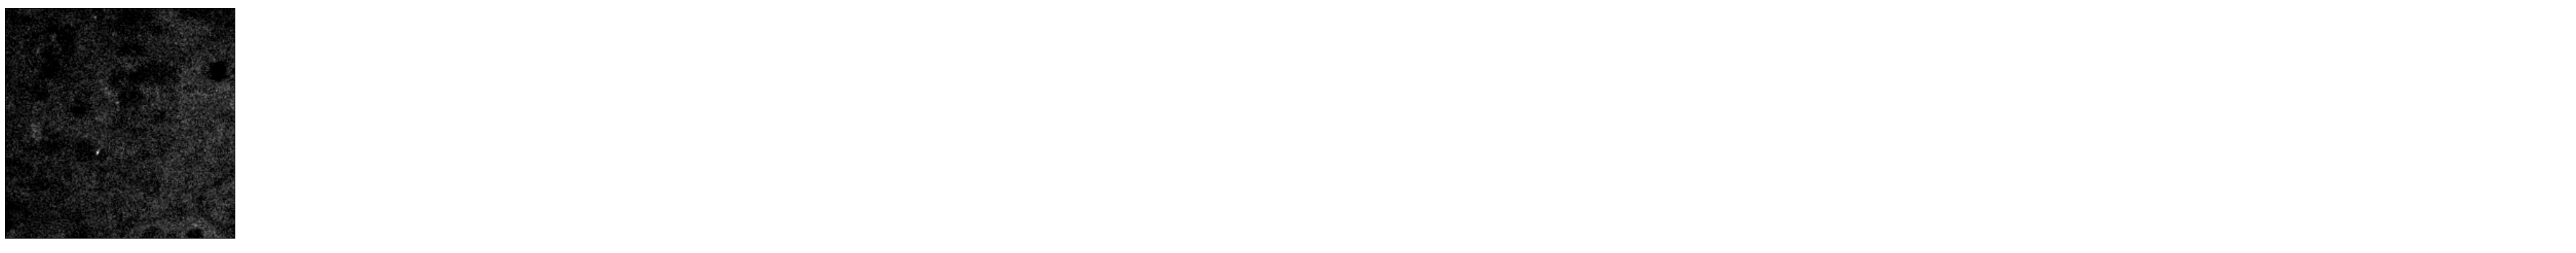

In [24]:
for scheme in schemes:
    patches_with_desired_label = \
extract_patches_given_locations_multiple_sections(addresses=address_tuples_with_desired_label[:10],
#                                                     images={('MD661', 199): img_16bit},
                                                  win_id=win_id, 
                                                normalization_scheme=scheme,
                                                 location_or_grid_index='grid_index')

    display_images_in_grids(patches_with_desired_label[::100], nc=10, cmap=plt.cm.gray)

In [696]:
features_df = DataFrame(index=addresses_df.index, columns=scheme_transform_multiindex)

In [709]:
for variant in [0]:

    t = time.time()
#             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
    patches_rotated = rotate_all_patches_variant(patches_with_desired_label[:1], variant=variant)
    sys.stderr.write('Variants: %.2f seconds\n' % (time.time() - t))

    #############################

    t1 = time.time()
    features = convert_image_patches_to_features(patches_rotated, model=model, 
                                                 mean_img=mean_img, 
                                                 batch_size=batch_size)
    sys.stderr.write('Feature computation: %.2f seconds\n' % (time.time() - t1))
    
    for i, f in enumerate(features):
        features_df[(scheme, 'transform%d'%variant)][addresses_with_desired_label.index[i]] = f

Variants: 0.00 seconds


(256, 1, 224, 224)


Feature computation: 0.37 seconds


In [274]:
negative_composition_rules = ['surround500']

In [238]:
fixed_n_pos = 500
fixed_n_neg = 500

In [239]:
acc_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
tp_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
# fn_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
fp_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
# tn_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
precision_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
recall_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
f1score_normalized_all_clfs_all_structures_all_negcomprule =  defaultdict(lambda: defaultdict(dict))

classifier_ids = [0]

for classifier_id in classifier_ids:
    
    clf_allClasses = trained_classifiers

    ####################################################
    # Compute accuracy against each structure surround #
    ####################################################
    
    for neg_composition_rule in negative_composition_rules:
            
        ncols = 5
        nrows = int(np.ceil(len(structures_found)/float(ncols)))

    #     fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
    #     axes = axes.flatten()

        for i, structure in enumerate(structures_found):

#             features_pos = test_features[structure]
            features_pos = features_pos_unused
    
            if fixed_n_pos is not None:
                features_pos = features_pos[np.random.choice(range( len(features_pos)), replace=False, size=(min(fixed_n_pos, len(features_pos)),))]

            n_pos = len(features_pos)
            print structure, n_pos, 'positive'

            if neg_composition_rule.startswith('surround'):
                if neg_composition_rule == 'surround200':
                    margin_um = 200
                elif neg_composition_rule == 'surround500':
                    margin_um = 500
                elif neg_composition_rule == 'surround1000':
                    margin_um = 1000
                else:
                    margin_um = None
                neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')] + \
                [convert_to_surround_name(structure, margin=margin_um, suffix=surr_l) for surr_l in structures_found]
            elif neg_composition_rule == 'negative':
                neg_classes = [structure + '_negative']
            else:
                raise
            
            neg_classes = list(set(neg_classes) & set(labels_found))

#             features_neg = np.vstack([test_features[neg_class] for neg_class in neg_classes])
            features_neg = features_neg_unused
    
            if fixed_n_neg is not None:
                features_neg = features_neg[np.random.choice(range( len(features_neg)), replace=False, size=(min(fixed_n_neg, len(features_neg)),))]        

            n_neg = len(features_neg)
            print structure, n_neg, 'negative'

            test_data = np.r_[features_pos, features_neg]
            test_labels = np.r_[np.ones((features_pos.shape[0], )), 
                                 -np.ones((features_neg.shape[0], ))]

            if structure not in clf_allClasses:
                sys.stderr.write('Classifier for structure %s does not exist.\n' %  structure)
                continue

            clf = clf_allClasses[structure]

            probs = clf.predict_proba(test_data)[:, clf.classes_.tolist().index(1.)]
            
            
            ######### SOFT ########
#             cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=True,
#                                              normalize=False)
#             tp = cm[0,0]
#             fn = cm[0,1]
#             fp = cm[1,0]
#             tn = cm[1,1]

#             acc = (tp + tn) / (n_pos + n_neg)
#             acc_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = acc

            ######## PRECISION-RECALL ########
            precision_allthresh = {}
            recall_allthresh = {}
            f1score_allthresh = {}
            tp_normalized_allthresh = {}
            fp_normalized_allthresh = {}
            for th in np.arange(0., 1., 0.01):
            
                cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=False,
                                             normalize=False, binary=True, decision_thresh=th)

                tp = cm[0,0]
                fn = cm[0,1]
                fp = cm[1,0]
                tn = cm[1,1]
                
                tp_normalized = tp / n_pos
#                 fn_normalized = fn / n_pos
                fp_normalized = fp / n_neg
#                 tn_normalized = tn / n_neg

                precision = float(tp) / (tp + fp)
                recall = float(tp) / (tp + fn)
                f1score = 2*recall*precision/(recall+precision)
                
                tp_normalized_allthresh[float(th)] = tp_normalized
                fp_normalized_allthresh[float(th)] = fp_normalized
                precision_allthresh[float(th)] = precision
                recall_allthresh[float(th)] = recall
                f1score_allthresh[float(th)] = f1score

            tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = tp_normalized_allthresh
#             fn_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = fn_normalized_allthresh
            fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = fp_normalized_allthresh
#             tn_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = tn_normalized_allthresh
            precision_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = precision_allthresh
            recall_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = recall_allthresh
            f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = f1score_allthresh
    #     plt.tight_layout()

        ############################

#         xticks = range(1, 1 + len(structures_sorted_by_size))

#         plt.figure(figsize=(10, 1.2));
#         plt.stem(xticks, [acc_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size]);
#         plt.xticks(xticks, structures_sorted_by_size, rotation='60');
#         plt.ylim([0.6, 1]);
#         plt.ylabel('Accuracy');
#         plt.xlabel('Structure Name');
#         plt.title('Accuracy, %s, classifier %d' % (neg_composition_rule, classifier_id));
#         plt.show();

#         print 'test accuracy:', np.mean(acc_all_clfs_all_structures[classifier_id].values())

#         plt.figure(figsize=(10, 1.2));
#         plt.stem(xticks, [tp_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='tp', markerfmt='bo');
#         plt.stem(xticks, [fn_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='fn', markerfmt='ro');
#         plt.stem(xticks, [fp_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='fp', markerfmt='ko');
#         plt.stem(xticks, [tn_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='tn', markerfmt='go');
#         plt.xticks(xticks, structures_sorted_by_size, rotation='60');
#         plt.ylabel('Percentage');
#         plt.xlabel('Structure Name');
#         plt.title('Accuracy, %s, classifier %d' % (neg_composition_rule, classifier_id));
#         plt.legend();
#         plt.show();

tp_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
# fn_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
fp_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
# tn_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
precision_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
recall_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
f1score_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None

SNR 500 positive
SNR 500 negative


In [240]:
structures_sorted_by_size = ['SNR']

In [241]:
fopt_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
optthresh_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))

for classifier_id in classifier_ids:

    for neg_composition_rule in negative_composition_rules:

        for s in structures_sorted_by_size:
            fp_allthresh = fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            tp_allthresh = tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            f_allthresh = f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]

            optimal_th = np.arange(0, 1, 0.01)[np.nanargmax([f_allthresh[th] for th in np.arange(0, 1, 0.01)])]
            optthresh_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] = optimal_th
            fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] = f_allthresh[optimal_th]

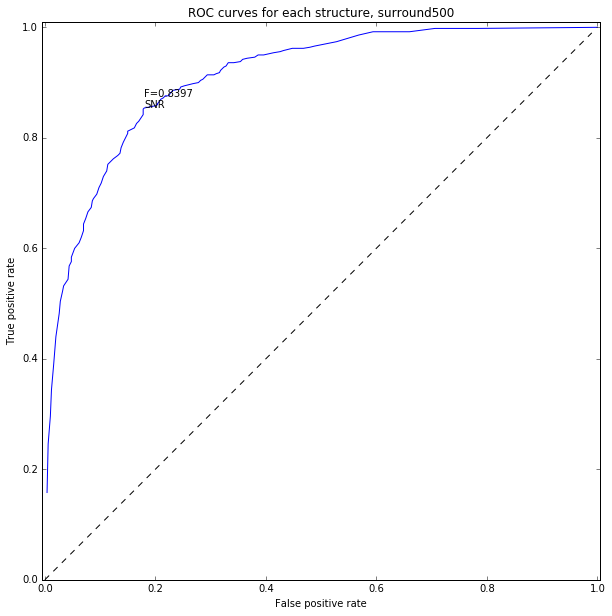

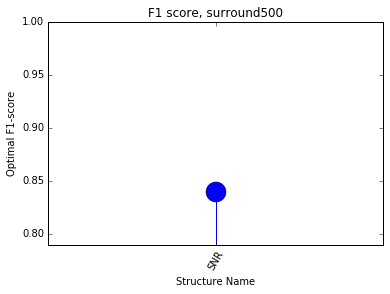

In [242]:
for classifier_id in classifier_ids:
    for neg_composition_rule in negative_composition_rules:

    #     plt.figure(figsize=(15, 10));
        plt.figure(figsize=(10, 10));
        plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), c='k', linestyle='--');

        fopt = {}
        for s in structures_sorted_by_size:
            fp_allthresh = fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            tp_allthresh = tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            f_allthresh = f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]

            plt.plot([fp_allthresh[float(th)] for th in np.arange(0, 1, 0.01)],
                 [tp_allthresh[float(th)] for th in np.arange(0, 1, 0.01)]);

            optimal_th = optthresh_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            fopt = f_allthresh[optimal_th]

    #         plt.scatter(fp_allthresh[optimal_th], tp_allthresh[optimal_th], 
    #             marker='o', facecolors='none', edgecolors='k')
            plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th]+.02, 'F=%.4f' % (fopt))
            plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th], s, fontsize=10)

    #     plt.legend();
        plt.ylabel('True positive rate');
        plt.xlabel('False positive rate');
    #     plt.xticks(np.arange(0,1,.1));
        plt.axis('equal');
        plt.ylim([0,1.01]);
        plt.xlim([0,1]);
        plt.title('ROC curves for each structure, %s' % (neg_composition_rule));
        plt.show();

    #     plt.figure();
    #     plt.hist(fopt.values(), bins=np.arange(0.7, 1.0, 0.01));
    #     plt.ylabel("Number of structures");
    #     plt.xlabel("Optimal f1 score");
    #     plt.show();

        plt.figure();
        xticks = range(1, 1 + len(structures_sorted_by_size))
        (markerLines, stemLines, baseLines) = plt.stem(xticks, 
                                                       [fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] 
                                                        for s in structures_sorted_by_size],
         markerfmt='o', markevery=[4,8]);
        plt.setp(markerLines, markersize=20, alpha=1.)
        plt.xticks(xticks, structures_sorted_by_size, rotation='60');
        plt.ylabel('Optimal F1-score');
        plt.xlabel('Structure Name');
        plt.ylim(np.min([fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] 
                                                        for s in structures_sorted_by_size])-.05, 1);
        plt.title('F1 score, %s' % (neg_composition_rule));
        plt.legend();
        plt.show();